# Image Classification.

Image classification using pre-trained model. Transfer Learning ResNet50.

In [60]:
# Imports
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [61]:
# re-size all images to this.
IMAGE_SIZE = [224, 224]

train_path = 'Datasets/Train'
val_path = 'Datasets/Test'

In [62]:
# Import RseNet50 library and add preprocessing layer to the front of ResNet. Use same weights as in Model.
#[224, 224] + [3] = [224, 224, 3] Since RGB has 3 channels.
#Since, we dont want to consider top layer and Output layer of Pre-trained model. include_top=Flase

resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [63]:
resnet.summary()

block4_3_bn[0][0]          
__________________________________________________________________________________________________
conv3_block4_out (Activation)   (None, 28, 28, 512)  0           conv3_block4_add[0][0]           
__________________________________________________________________________________________________
conv4_block1_1_conv (Conv2D)    (None, 14, 14, 256)  131328      conv3_block4_out[0][0]           
__________________________________________________________________________________________________
conv4_block1_1_bn (BatchNormali (None, 14, 14, 256)  1024        conv4_block1_1_conv[0][0]        
__________________________________________________________________________________________________
conv4_block1_1_relu (Activation (None, 14, 14, 256)  0           conv4_block1_1_bn[0][0]          
__________________________________________________________________________________________________
conv4_block1_2_conv (Conv2D)    (None, 14, 14, 256)  590080      conv4_block1_1_r

In [64]:
# dont train existing weights of ResNet model.
for layer in resnet.layers:
    layer.trainable = False

In [65]:
#useful for getting number of output classes
folders = glob('Datasets/Train/*')
folders

['Datasets/Train/mercedes',
 'Datasets/Train/lamborghini',
 'Datasets/Train/audi']

In [66]:
# our layers
x = Flatten()(resnet.output)

In [67]:
# our output layer
prediction = Dense(len(folders), activation='softmax')(x)

#create a model object.
model = Model(inputs=resnet.input, outputs=prediction)

In [82]:
model.summary()
model.save('my_ResNet.h5')

0][0]           
__________________________________________________________________________________________________
conv4_block1_1_bn (BatchNormali (None, 14, 14, 256)  1024        conv4_block1_1_conv[0][0]        
__________________________________________________________________________________________________
conv4_block1_1_relu (Activation (None, 14, 14, 256)  0           conv4_block1_1_bn[0][0]          
__________________________________________________________________________________________________
conv4_block1_2_conv (Conv2D)    (None, 14, 14, 256)  590080      conv4_block1_1_relu[0][0]        
__________________________________________________________________________________________________
conv4_block1_2_bn (BatchNormali (None, 14, 14, 256)  1024        conv4_block1_2_conv[0][0]        
__________________________________________________________________________________________________
conv4_block1_2_relu (Activation (None, 14, 14, 256)  0           conv4_block1_2_bn[0][0]    

In [69]:
# Defining cost and optimization method.
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [70]:
# Data augmentation.
train_datagen = ImageDataGenerator(rescale=1./255,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True)


test_datagen = ImageDataGenerator(rescale=1./255)

In [71]:
#set target size same as initialized IMAGE SIZE
train_set = train_datagen.flow_from_directory('Datasets/Train',
                                                target_size=(224, 224),
                                                batch_size=32,
                                                class_mode='categorical')

Found 64 images belonging to 3 classes.


In [72]:
test_set = test_datagen.flow_from_directory('Datasets/Test',
                                            target_size=(224, 224),
                                            batch_size=32,
                                            class_mode='categorical')

Found 58 images belonging to 3 classes.


In [73]:
# Fit the model
c_model = model.fit_generator(train_set,
                             validation_data=test_set,
                             epochs=50,
                             steps_per_epoch=len(train_set),
                             validation_steps=len(test_set), verbose=1) 

Epoch 1/50
2/2 [==============================] - 18s 9s/step - loss: 2.7012 - accuracy: 0.4062 - val_loss: 14.7287 - val_accuracy: 0.3276
Epoch 2/50
2/2 [==============================] - 15s 7s/step - loss: 9.7268 - accuracy: 0.3906 - val_loss: 2.7814 - val_accuracy: 0.5172
Epoch 3/50
2/2 [==============================] - 15s 8s/step - loss: 3.8063 - accuracy: 0.4062 - val_loss: 6.1946 - val_accuracy: 0.1552
Epoch 4/50
2/2 [==============================] - 16s 8s/step - loss: 4.4411 - accuracy: 0.3438 - val_loss: 1.2761 - val_accuracy: 0.5172
Epoch 5/50
2/2 [==============================] - 15s 8s/step - loss: 1.7041 - accuracy: 0.5781 - val_loss: 2.6572 - val_accuracy: 0.3448
Epoch 6/50
2/2 [==============================] - 14s 7s/step - loss: 3.1099 - accuracy: 0.4062 - val_loss: 1.8815 - val_accuracy: 0.6034
Epoch 7/50
2/2 [==============================] - 15s 8s/step - loss: 1.6508 - accuracy: 0.5469 - val_loss: 1.5100 - val_accuracy: 0.3448
Epoch 8/50
2/2 [=================

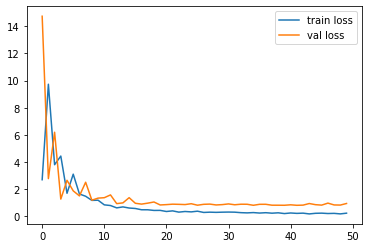

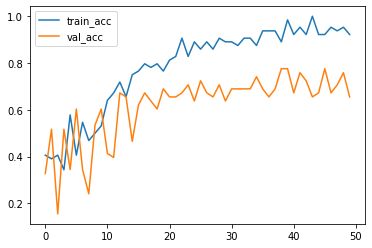

In [78]:
# Plot loss
plt.plot(c_model.history['loss'], label='train loss')
plt.plot(c_model.history['val_loss'], label='val loss')
plt.legend()
plt.show()

# Plot accuracy
plt.plot(c_model.history['accuracy'], label='train_acc')
plt.plot(c_model.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()


In [94]:
y_pred = model.predict(test_set)

In [95]:
# Get highest probability.
y_class = np.argmax(y_pred, axis=1)
y_class

array([1, 2, 0, 1, 0, 2, 2, 2, 0, 1, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 0,
       1, 2, 2, 2, 2, 1, 0, 1, 2, 1, 1, 2, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2,
       2, 1, 2, 1, 1, 2, 1, 2, 2, 1, 2, 2, 2, 1])

In [96]:
# Load model
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

model = load_model('my_ResNet.h5')

In [97]:
img = image.load_img('Datasets/Test/audi/21.jpg', target_size=(224,224))

In [102]:
x = image.img_to_array(img)
x = x/255

In [103]:
x = np.expand_dims(x, axis=0)
img_data = preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [104]:
model.predict(img_data)

array([[0.00819133, 0.00542617, 0.9863825 ]], dtype=float32)

In [109]:
a = np.argmax(model.predict(img_data), axis=1)
a

array([2])